### Stepwise regression Analysis - Winequality-red Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('winequality-red.csv',delimiter=';')
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**The dataset has 12 variables.**

In [2]:
data.shape

(1599, 12)

In [2]:
#clean column names
data.columns = data.columns.str.replace(' ','_')
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
#missing values check
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Correlation of Variables

<AxesSubplot:>

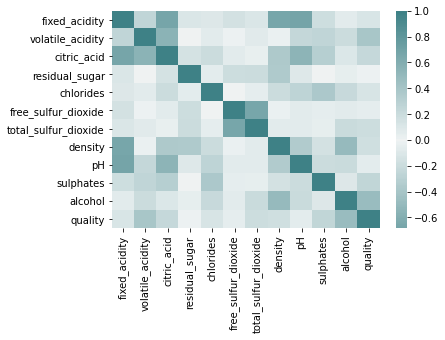

In [29]:
sns.heatmap(data.corr(),cmap=sns.diverging_palette(200,200,as_cmap=True),center = 0)

From above correlation matrix, it can be seen that the variables pH, density and fixed_acidity are correlated. Secondly, variables total_sulfur_dioxide and free_sulfur_dioxide are positively correlated. Also, variable citric_acid is positively correlated with fixed_acidity. 

#### Dependent & Independent Variables

'Quality' is the dependent variable. 

Based on correlation of variables, 6 variables : 'alcohol', 'sulphates', 'volatile_acidity', 'total_sulfur_dioxide', 'density' and 'chlorides' are chosen as independent variables to perform the stepwise regression analysis. 

In [10]:
#dependent variable
y = data.quality
x = data.copy()
cols_to_drop = ['quality',
                'fixed_acidity', 
                'free_sulfur_dioxide',
                'pH',
                'citric_acid',
                'residual_sugar']
# 6 independent varaiables selected - alcohol, sulphates, 
# volatile_acidity,total_sulfur_dioxide, density, chlorides
x = data.drop(cols_to_drop,axis = 1)

#### Adjusted R-Square selection Regression Analysis

The OLS regression model from the statsmodels module is used to perform adjusted R-square selection.

In [11]:
import statsmodels.api as sm
# stepwise regression
x = sm.add_constant(x)
out = sm.OLS(y,x)
model = out.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     143.9
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          6.34e-146
Time:                        17:25:26   Log-Likelihood:                -1580.2
No. Observations:                1599   AIC:                             3174.
Df Residuals:                    1592   BIC:                             3212.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.1625     10.288     -0.307      0.759     -23.342      17.017
volatile_acidity        -1.1397      0.097    -11.746      0.000      -1.330      -0.949
chlorides               -1.7100      0.392     -4.364      0.000      -2.479      -0.941
total_sulfur_dioxide    -0.0023      0.001     -4.508      0.000      -0.003      -0.001
density                  6.1347     10.232      0.600      0.549     -13.934      26.203
sulphates                0.9024      0.112      8.040      0.000       0.682       1.123
alcohol                  0.2828      0.019     14.861      0.000       0.245       0.320
==============================================================================
Omnibus:                       25.801   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.640
Skew:                          -0.157   Prob(JB):                     4.07e-09
Kurtosis:                       3.694   Cond. No.                     5.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As p-value of variable **density** is **>0.05**, it implies this variable is not statistically significant, hence can be dropped.

In [12]:
#statistically insignificant variable dropped
x = x.drop('density',axis=1)

In [13]:
# stepwise regression model
out = sm.OLS(y,x)
model = out.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     172.7
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          5.48e-147
Time:                        17:26:52   Log-Likelihood:                -1580.4
No. Observations:                1599   AIC:                             3173.
Df Residuals:                    1593   BIC:                             3205.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.0049      0.204     14.747      0.000       2.605       3.405
volatile_acidity        -1.1419      0.097    -11.779      0.000      -1.332      -0.952
chlorides               -1.7048      0.392     -4.352      0.000      -2.473      -0.937
total_sulfur_dioxide    -0.0023      0.001     -4.544      0.000      -0.003      -0.001
sulphates                0.9148      0.110      8.296      0.000       0.699       1.131
alcohol                  0.2771      0.016     16.811      0.000       0.245       0.309
==============================================================================
Omnibus:                       25.233   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.739
Skew:                          -0.153   Prob(JB):                     6.38e-09
Kurtosis:                       3.688   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Conclusion

The adjusted R-square of the model is **34.9%**. The stepwise regression analysis on the same dataset was done using **SAS** and the results were same as the above. The adjusted R-square of the model was **34.4%**. 